In [99]:
import numpy as np
import pandas as pd
from collections import defaultdict
import re

In [100]:
df_fake = pd.read_csv(r"C:\Users\KIIT0\Downloads\News _dataset\Fake.csv")

In [101]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [102]:
df_fake=df_fake.drop(['subject','date'],axis=1)

In [103]:
df_fake.head()

,title,text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...


In [104]:
df_fake.text.shape

(23481,)

In [105]:
df_fake['label'] ='FAKE' 

In [106]:
df_fake.head()

,title,text,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,FAKE
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,FAKE
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",FAKE
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",FAKE
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,FAKE


In [107]:
df_true = pd.read_csv(r"C:\Users\KIIT0\Downloads\News _dataset\True.csv")

In [108]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [109]:
df_true=df_true.drop(['subject','date'],axis=1)

In [110]:
df_true.head()

,title,text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...


In [111]:
df_true['label']='TRUE'
df_true.head()

,title,text,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,TRUE
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,TRUE
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,TRUE
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,TRUE
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,TRUE


In [112]:
data_train = pd.concat([df_true, df_fake], ignore_index=True)
data_train.head()

,title,text,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,TRUE
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,TRUE
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,TRUE
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,TRUE
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,TRUE


In [113]:
data_train.shape

(44898, 3)

In [114]:
data_train.to_csv('fake_news.csv')

In [115]:
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import nltk, os, re, string
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from tensorflow.keras.preprocessing import text, sequence
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [116]:
df = pd.read_csv(r"C:\Users\KIIT0\Downloads\fake_news.csv")
df =df.reindex(np.random.permutation(df.index))
df.head()

,Unnamed: 0,title,text,label
40870,40870,NFL LEGEND Who Supported Hillary Leaves CNN Ho...,I fell in love with him [Trump] because he re...,FAKE
39987,39987,DONALD RUMSELD HUMILIATES “The View” Dingbat J...,There is no question that Whoopi Goldberg is a...,FAKE
1207,1207,"Trump declares Obamacare 'dead,' urges Democra...",WASHINGTON (Reuters) - U.S. President Donald T...,TRUE
32500,32500,HEY “SIMPLETONS”…We’ve Got Great News! The Lef...,Lauren Southern is one tough reporter. She s n...,FAKE
33515,33515,BRILLIANT: REP KING Calls Out CIA Director For...,https://www.youtube.com/watch?v=HXJZbPAf0sk,FAKE


In [117]:
df.drop(['Unnamed: 0'],axis=1, inplace=True)
df.head()

,title,text,label
40870,NFL LEGEND Who Supported Hillary Leaves CNN Ho...,I fell in love with him [Trump] because he re...,FAKE
39987,DONALD RUMSELD HUMILIATES “The View” Dingbat J...,There is no question that Whoopi Goldberg is a...,FAKE
1207,"Trump declares Obamacare 'dead,' urges Democra...",WASHINGTON (Reuters) - U.S. President Donald T...,TRUE
32500,HEY “SIMPLETONS”…We’ve Got Great News! The Lef...,Lauren Southern is one tough reporter. She s n...,FAKE
33515,BRILLIANT: REP KING Calls Out CIA Director For...,https://www.youtube.com/watch?v=HXJZbPAf0sk,FAKE


In [118]:
df.isna().sum()

title    0
text     0
label    0
dtype: int64

In [119]:
df.head()

,title,text,label
40870,NFL LEGEND Who Supported Hillary Leaves CNN Ho...,I fell in love with him [Trump] because he re...,FAKE
39987,DONALD RUMSELD HUMILIATES “The View” Dingbat J...,There is no question that Whoopi Goldberg is a...,FAKE
1207,"Trump declares Obamacare 'dead,' urges Democra...",WASHINGTON (Reuters) - U.S. President Donald T...,TRUE
32500,HEY “SIMPLETONS”…We’ve Got Great News! The Lef...,Lauren Southern is one tough reporter. She s n...,FAKE
33515,BRILLIANT: REP KING Calls Out CIA Director For...,https://www.youtube.com/watch?v=HXJZbPAf0sk,FAKE


In [120]:
df.isna().sum()

title    0
text     0
label    0
dtype: int64

In [121]:
df['nb_words'] = df.title.apply(lambda x: len(x.split()))
df['nb_unique_words'] = df.title.apply(lambda x: len(set(x.split())))
df['nb_char'] = df.title.apply(lambda x: len(x))
df["nb_special"] = df.apply(lambda p: sum( not q.isalpha() for q in p["title"] ), axis=1)
def punct(text):
    return(len([w for w in text.split() if w in list(string.punctuation)]))
df['nb_punct'] = df.title.apply(lambda x: punct(x))
stopword = stopwords.words('english')
def stop(text):
    return(len([w for w in text.split() if w in stopword]))
df['nb_stopwords'] = df.title.apply(lambda x: stop(x))

def title(text):
    return(len([w for w in text.split() if w.istitle()]))
df['nb_title_case'] = df.title.apply(lambda x: title(x))
def upper(text):
    return(len([w for w in text.split() if w.isupper()]))
df['nb_title_case'] = df.title.apply(lambda x: upper(x))

token = nltk.word_tokenize(''.join(df.title))
frequent = nltk.FreqDist(token)
frequent.most_common(15)


[(':', 13638),
 ('’', 13531),
 ('Trump', 10811),
 (',', 9779),
 ('to', 8950),
 ('To', 7564),
 ('s', 5880),
 ('”', 5470),
 ('VIDEO', 5329),
 ('[', 5239),
 (']', 5238),
 ('in', 5035),
 ('“', 5028),
 ('The', 4581),
 ('(', 4231)]

In [122]:
for sym in string.punctuation:
    del frequent[sym]
for word in stopword:
    del frequent[word]
frequent.most_common(15)

[('’', 13531),
 ('Trump', 10811),
 ('To', 7564),
 ('”', 5470),
 ('VIDEO', 5329),
 ('“', 5028),
 ('The', 4581),
 ("'s", 4156),
 ('For', 3964),
 ('In', 3575),
 ('Of', 3441),
 ('‘', 3438),
 ('A', 3083),
 ('Video', 2988),
 ('U.S.', 2943)]

In [123]:
freq_words = list(dict(frequent.most_common()[:100]).keys())
def freq(text):
    return(len([w for w in text.split() if w in freq_words]))
df['nb_freq_words'] = df.title.apply(lambda x: freq(x))

In [124]:
df.head()

,title,text,label,nb_words,nb_unique_words,nb_char,nb_special,nb_punct,nb_stopwords,nb_title_case,nb_freq_words
40870,NFL LEGEND Who Supported Hillary Leaves CNN Ho...,I fell in love with him [Trump] because he re...,FAKE,32,31,200,40,0,7,3,7
39987,DONALD RUMSELD HUMILIATES “The View” Dingbat J...,There is no question that Whoopi Goldberg is a...,FAKE,18,18,125,22,0,0,4,6
1207,"Trump declares Obamacare 'dead,' urges Democra...",WASHINGTON (Reuters) - U.S. President Donald T...,TRUE,10,10,73,13,0,1,0,1
32500,HEY “SIMPLETONS”…We’ve Got Great News! The Lef...,Lauren Southern is one tough reporter. She s n...,FAKE,16,16,97,24,0,0,2,4
33515,BRILLIANT: REP KING Calls Out CIA Director For...,https://www.youtube.com/watch?v=HXJZbPAf0sk,FAKE,15,15,95,18,0,1,4,3


In [125]:
freq_words = list(dict(frequent.most_common()[:100]).keys())
def freq(text):
    return(len([w for w in text.split() if w in freq_words])/len(text.split()))
df['avg_freq_word']= df.title.apply(lambda x: freq(x))

In [126]:
df.head()

,title,text,label,nb_words,nb_unique_words,nb_char,nb_special,nb_punct,nb_stopwords,nb_title_case,nb_freq_words,avg_freq_word
40870,NFL LEGEND Who Supported Hillary Leaves CNN Ho...,I fell in love with him [Trump] because he re...,FAKE,32,31,200,40,0,7,3,7,0.218750
39987,DONALD RUMSELD HUMILIATES “The View” Dingbat J...,There is no question that Whoopi Goldberg is a...,FAKE,18,18,125,22,0,0,4,6,0.333333
1207,"Trump declares Obamacare 'dead,' urges Democra...",WASHINGTON (Reuters) - U.S. President Donald T...,TRUE,10,10,73,13,0,1,0,1,0.100000
32500,HEY “SIMPLETONS”…We’ve Got Great News! The Lef...,Lauren Southern is one tough reporter. She s n...,FAKE,16,16,97,24,0,0,2,4,0.250000
33515,BRILLIANT: REP KING Calls Out CIA Director For...,https://www.youtube.com/watch?v=HXJZbPAf0sk,FAKE,15,15,95,18,0,1,4,3,0.200000


<Axes: xlabel='label', ylabel='count'>

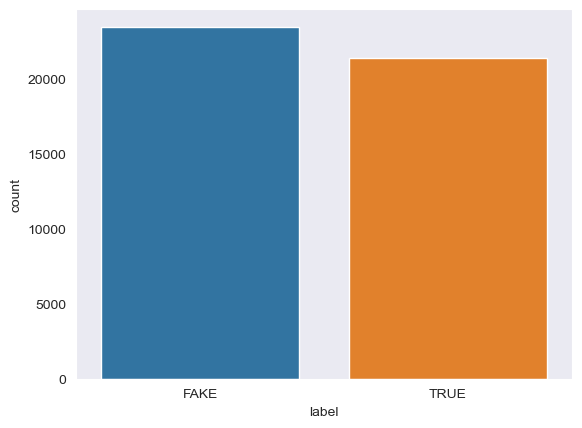

In [127]:
sns.set_style("dark")
sns.countplot(x='label', data=df)


In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [129]:
df_fake = df[df['label']=='FAKE']
df_true = df[df['label']=='TRUE']

<Axes: ylabel='Frequency'>

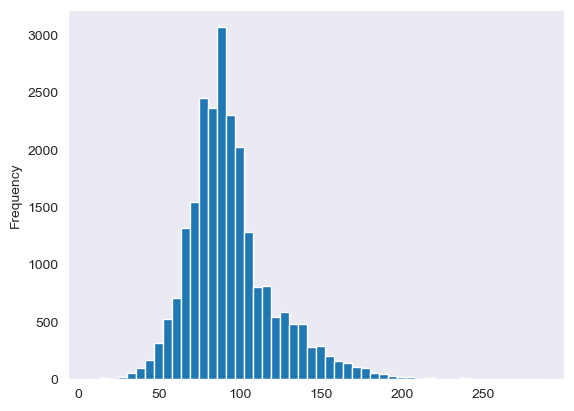

In [130]:
df_fake['nb_cyhar'].plot(bins=50, kind='hist')

In [131]:
df_fake['nb_char'].describe()

count    23481.000000
mean        94.198032
std         27.184433
min          8.000000
25%         77.000000
50%         90.000000
75%        105.000000
max        286.000000
Name: nb_char, dtype: float64

<Axes: ylabel='Frequency'>

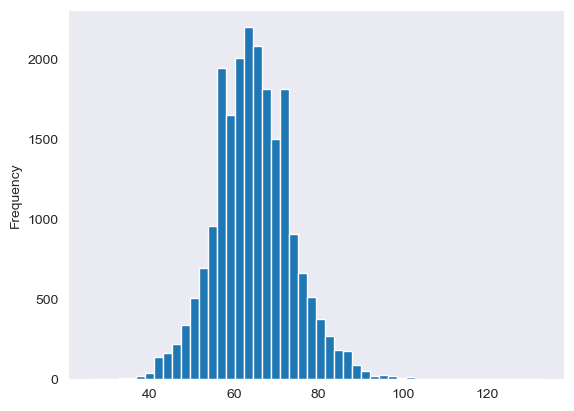

In [132]:
df_true['nb_char'].plot(bins=50, kind='hist')

In [133]:
df_true['nb_char'].describe()

count    21417.000000
mean        64.667881
std          9.168999
min         26.000000
25%         59.000000
50%         64.000000
75%         70.000000
max        133.000000
Name: nb_char, dtype: float64

<Axes: ylabel='Frequency'>

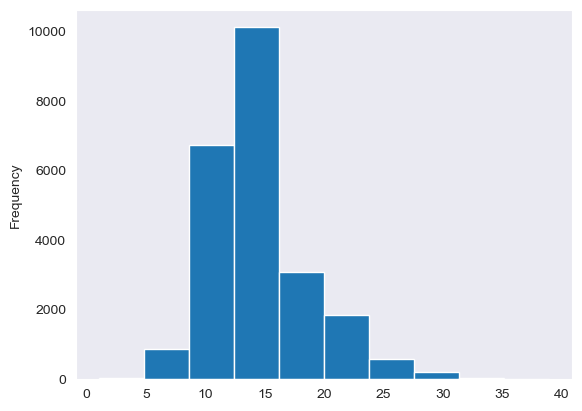

In [134]:
df_fake['nb_unique_words'].plot(bins=10, kind='hist')

In [135]:
df_fake['nb_unique_words'].describe()

count    23481.000000
mean        14.490609
std          4.129960
min          1.000000
25%         12.000000
50%         14.000000
75%         16.000000
max         39.000000
Name: nb_unique_words, dtype: float64

<Axes: ylabel='Frequency'>

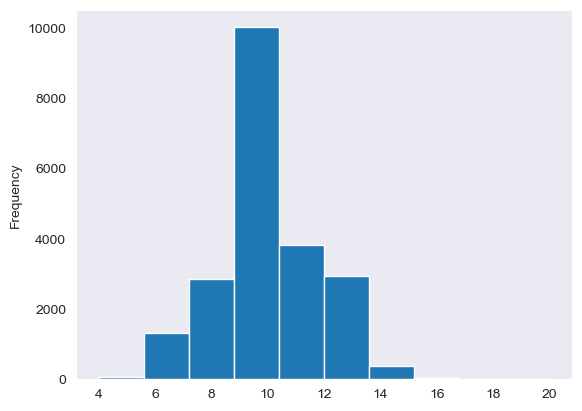

In [136]:
df_true['nb_unique_words'].plot(bins=10, kind='hist')

In [137]:
df_true['nb_unique_words'].describe()

count    21417.000000
mean         9.876827
std          1.656130
min          4.000000
25%          9.000000
50%         10.000000
75%         11.000000
max         20.000000
Name: nb_unique_words, dtype: float64

C:\Users\KIIT0\AppData\Local\Temp\ipykernel_4676\2947344286.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_fake['nb_words'])


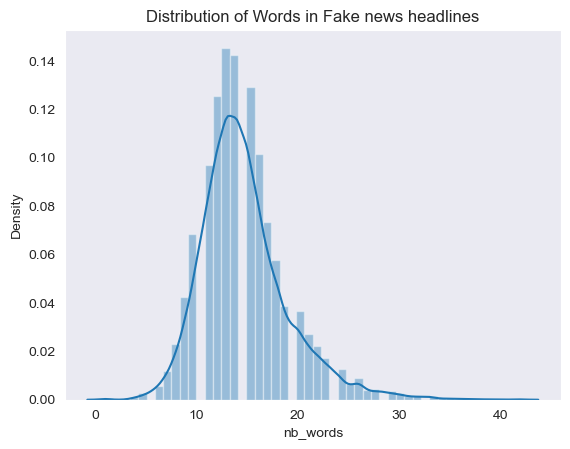

In [138]:
sns.distplot(df_fake['nb_words'])
plt.title("Distribution of Words in Fake news headlines")
plt.show()

C:\Users\KIIT0\AppData\Local\Temp\ipykernel_4676\2072667133.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_true['nb_words'])


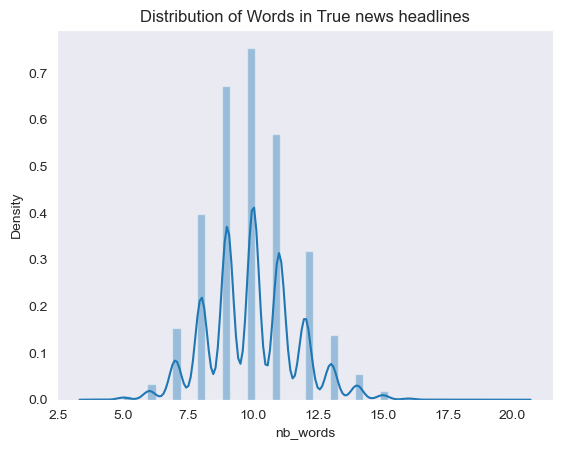

In [139]:
sns.distplot(df_true['nb_words'])
plt.title("Distribution of Words in True news headlines")
plt.show()

C:\Users\KIIT0\AppData\Local\Temp\ipykernel_4676\1365854307.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_true['nb_special'])


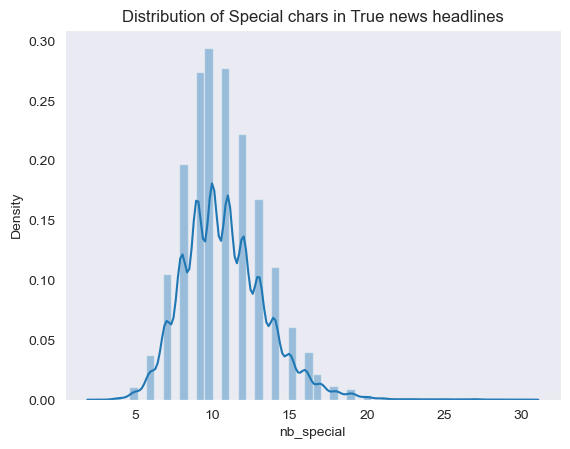

In [140]:
sns.distplot(df_true['nb_special'])
plt.title("Distribution of Special chars in True news headlines")
plt.show()

C:\Users\KIIT0\AppData\Local\Temp\ipykernel_4676\223114589.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_fake['nb_special'])


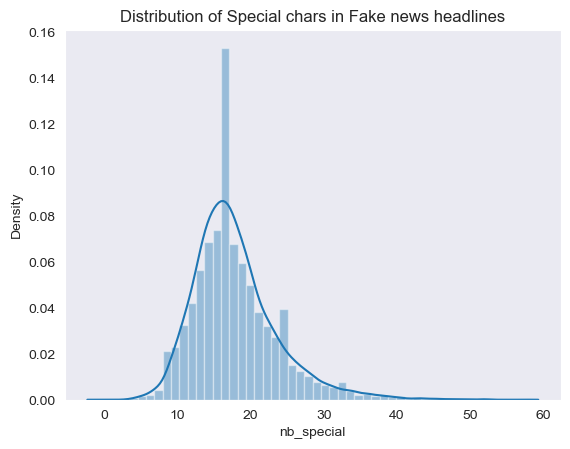

In [141]:
sns.distplot(df_fake['nb_special'])
plt.title("Distribution of Special chars in Fake news headlines")
plt.show()

In [142]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

df['title']=df['title'].apply(remove_stopwords)

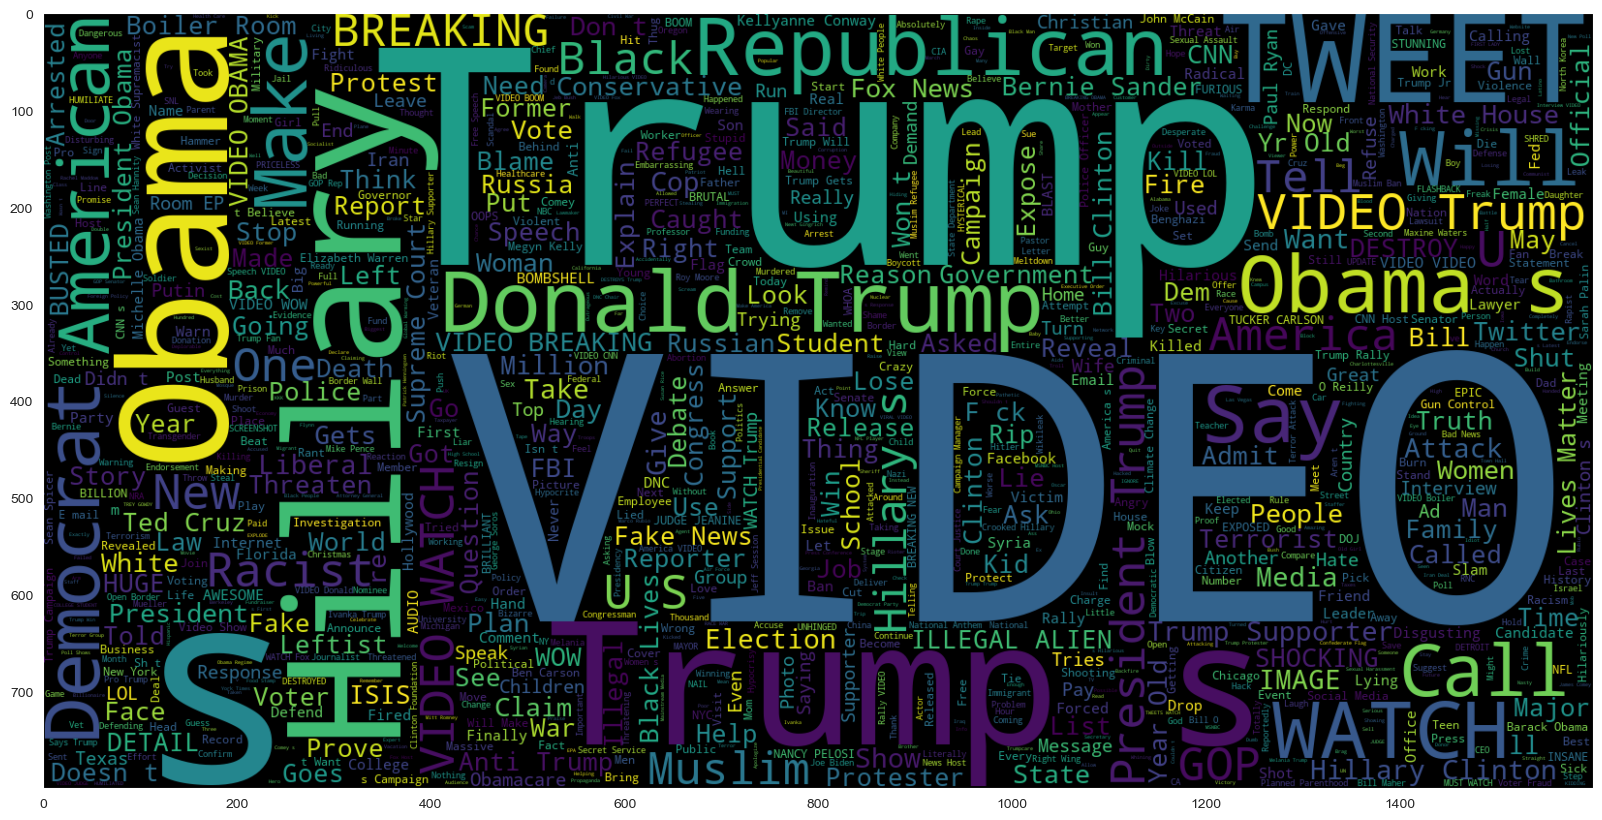

In [143]:
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(df_fake.title))
plt.imshow(wc , interpolation = 'bilinear')

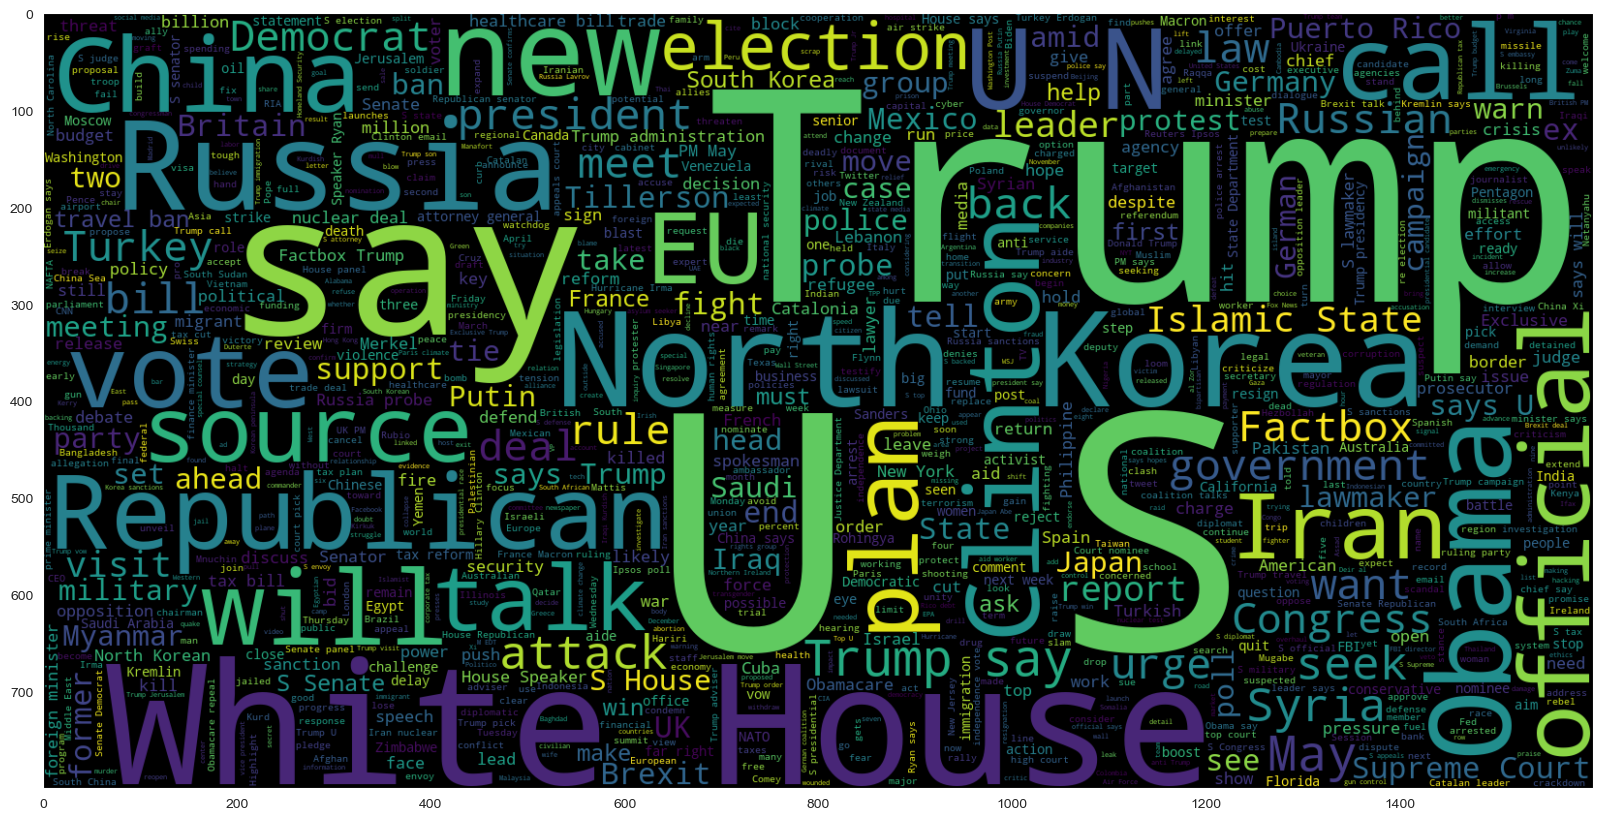

In [144]:
plt.figure(figsize = (20,20)) # Text that is True News Headlines
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(df_true.title))
plt.imshow(wc , interpolation = 'bilinear')

In [145]:
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import nltk, re, string
from string import punctuation
from nltk.corpus import stopwords
from sklearn import metrics
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Embedding, Input, LSTM, Bidirectional, GlobalMaxPool1D, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT0\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [146]:
df = pd.read_csv(r"C:\Users\KIIT0\Downloads\fake_news.csv")

df.head()

,Unnamed: 0,title,text,label
0,0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,TRUE
1,1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,TRUE
2,2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,TRUE
3,3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,TRUE
4,4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,TRUE


In [147]:
def extract_txt(text):
    regex = re.search(r"(?<=\(Reuters\)\s\-\s).*",text)
    if regex:
        return regex.group(0)
    return text
df['text_processed'] = df['text'].apply(extract_txt)

In [148]:
df.drop(['Unnamed: 0'],axis=1, inplace=True)
df["label"] = df.label.apply(lambda  x:0 if x=='TRUE' else 1)
df.head()


,title,text,label,text_processed
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,0,The head of a conservative Republican faction ...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,0,Transgender people will be allowed for the fir...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,0,The special counsel investigation of links bet...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,0,Trump campaign adviser George Papadopoulos tol...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,0,President Donald Trump called on the U.S. Post...


In [149]:
df['final_news'] = df['title'] + " " + df['text_processed']
df.head()

,title,text,label,text_processed,final_news
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,0,The head of a conservative Republican faction ...,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,0,Transgender people will be allowed for the fir...,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,0,The special counsel investigation of links bet...,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,0,Trump campaign adviser George Papadopoulos tol...,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,0,President Donald Trump called on the U.S. Post...,Trump wants Postal Service to charge 'much mor...


In [150]:
cols_del =['title','text','text_processed']
df = df.drop(cols_del,axis=1)

df.head()

,label,final_news
0,0,"As U.S. budget fight looms, Republicans flip t..."
1,0,U.S. military to accept transgender recruits o...
2,0,Senior U.S. Republican senator: 'Let Mr. Muell...
3,0,FBI Russia probe helped by Australian diplomat...
4,0,Trump wants Postal Service to charge 'much mor...


In [151]:
stop = stopwords.words('english')

def cleanText(txt):
  # lowercaing
    txt = txt.lower()
  # removing stopwords
    txt = ' '.join([word for word in txt.split() if word not in (stop)])
  # removing non-alphabetic characters
    txt = re.sub('[^a-z]',' ',txt)
    return txt  

In [152]:
df['final_news'] = df['final_news'].apply(cleanText)
df.head()

,label,final_news
0,0,u s budget fight looms republicans flip fisc...
1,0,u s military accept transgender recruits mond...
2,0,senior u s republican senator let mr muell...
3,0,fbi russia probe helped australian diplomat ti...
4,0,trump wants postal service charge much more ...


In [153]:
path = r"C:\Users\KIIT0\Downloads\fake_news.csv"

EMBEDDING_FILE=f'{path}/glove.6B.50d.txt'

# configuration setting
MAX_SEQUENCE_LENGTH = 100
MAX_VOCAB_SIZE = 20000
EMBEDDING_DIM = 50
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 32
EPOCHS = 50

In [2]:
y = df['label'].values
X = df.drop(['label'],axis=1)

NameError: name 'df' is not defined

In [155]:
y.shape

(44898,)

In [156]:
EMBEDDING_FILE = r"C:/Users/KIIT0/Downloads/glove.6B.50d.txt"

print('Loading word vectors...')
word2vec = {}
with open(EMBEDDING_FILE, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vec = np.asarray(values[1:], dtype='float32')
        word2vec[word] = vec
print('Found %s word vectors.' % len(word2vec))


Loading word vectors...
Found 400000 word vectors.


In [157]:
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(list(X['final_news']))
X = tokenizer.texts_to_sequences(list(X['final_news']))

X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (44898, 100)


In [158]:
word2idx = tokenizer.word_index
print('Found %s unique tokens.' % len(word2idx))

Found 115831 unique tokens.


In [159]:
print('Filling pre-trained embeddings...')
num_words = min(MAX_VOCAB_SIZE, len(word2idx) + 1)
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word2idx.items():
  if i < MAX_VOCAB_SIZE:
    embedding_vector = word2vec.get(word)
    if embedding_vector is not None:
      # words not found in embedding index will be all zeros.
      embedding_matrix[i] = embedding_vector

Filling pre-trained embeddings...


In [160]:
embedding_layer = Embedding(
  num_words,
  EMBEDDING_DIM,
  weights=[embedding_matrix],
  input_length=MAX_SEQUENCE_LENGTH,
  trainable=False
)

C:\Users\KIIT0\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [161]:
print('Building model...')

input_ = Input(shape=(MAX_SEQUENCE_LENGTH,))
x = embedding_layer(input_)
# x = LSTM(15, return_sequences=True)(x)
x = Bidirectional(LSTM(15, return_sequences=True))(x)
x = GlobalMaxPool1D()(x)
output = Dense(1, activation="sigmoid")(x)

model = Model(input_, output)
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)
model.summary()

Building model...


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_1 (Embedding)              │ (None, 100, 50)             │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 100, 30)             │           7,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_1               │ (None, 30)                  │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,007,951 (3.85 MB)

 Trainable params: 7,951 (31.06 KB)

 Non-trainable params: 1,000,000 (3.81 MB)

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,stratify=y, random_state=0)

In [163]:
print('Training model...')
r = model.fit(
  X_train,
  y_train,
  batch_size=BATCH_SIZE,
  epochs=EPOCHS,
  validation_split=VALIDATION_SPLIT
)

Training model...
Epoch 1/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 93s 85ms/step - accuracy: 0.8417 - loss: 0.3474 - val_accuracy: 0.9543 - val_loss: 0.1208
Epoch 2/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 71s 79ms/step - accuracy: 0.9593 - loss: 0.1133 - val_accuracy: 0.9697 - val_loss: 0.0833
Epoch 3/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 70s 78ms/step - accuracy: 0.9718 - loss: 0.0820 - val_accuracy: 0.9736 - val_loss: 0.0768
Epoch 4/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 70s 77ms/step - accuracy: 0.9800 - loss: 0.0597 - val_accuracy: 0.9787 - val_loss: 0.0610
Epoch 5/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 70s 78ms/step - accuracy: 0.9840 - loss: 0.0484 - val_accuracy: 0.9802 - val_loss: 0.0547
Epoch 6/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 68s 76ms/step - accuracy: 0.9852 - loss: 0.0466 - val_accuracy: 0.9786 - val_loss: 0.0608
Epoch 7/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 69s 77ms/step - accuracy: 0.9876 - loss: 0.0361 - val_accuracy: 0.9804 - val_loss: 0.0541
Epoch 8/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 70s 78ms/step - accuracy: 0.9906

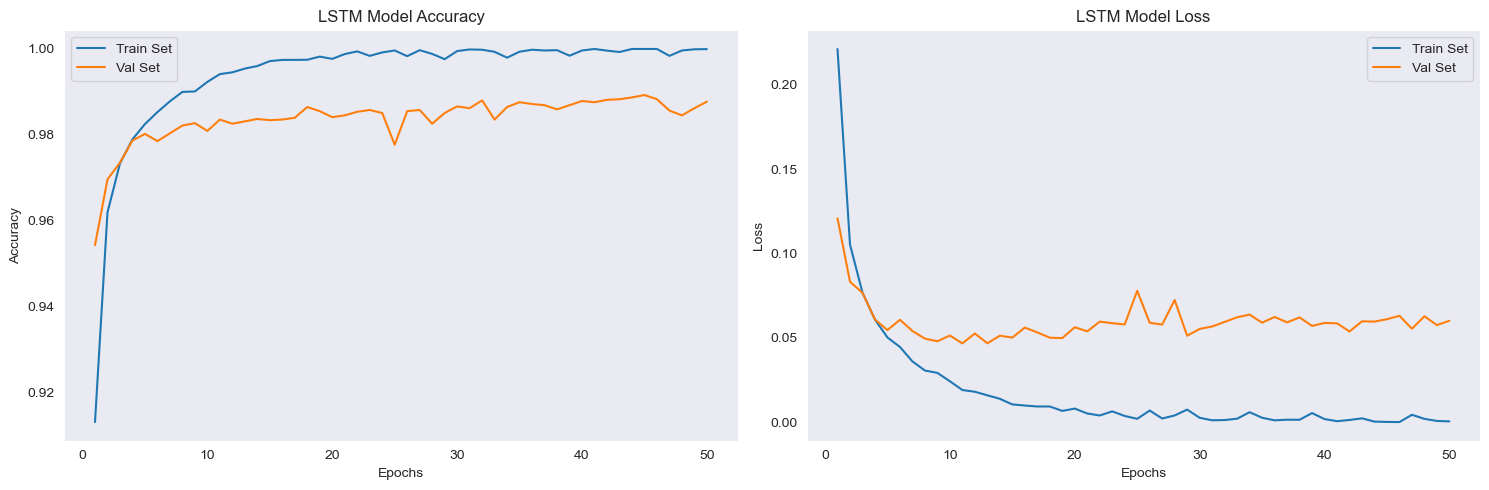

In [164]:
acc = r.history['accuracy']
val_acc = r.history['val_accuracy']
loss = r.history['loss']
val_loss = r.history['val_loss']
epochs_range = range(1, len(r.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('LSTM Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('LSTM Model Loss')

plt.tight_layout()
plt.show()

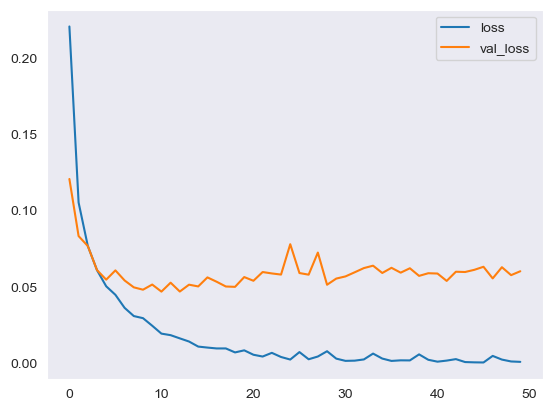

In [165]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

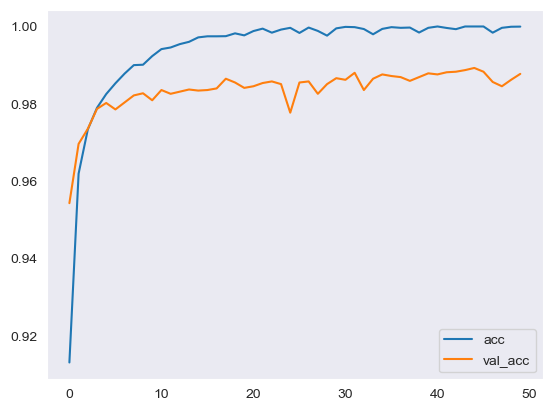

In [166]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [167]:
print("Accuracy of the model on Training Data is - " , model.evaluate(X_train,y_train)[1]*100)
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100)

1123/1123 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.9997 - loss: 0.0016
Accuracy of the model on Training Data is -  99.75499510765076
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9851 - loss: 0.0784
Accuracy of the model on Testing Data is -  98.65255951881409


In [168]:
pred = model.predict(X_test)
pred[:5]

281/281 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


array([[1.0000000e+00],
       [1.0566077e-05],
       [1.0000000e+00],
       [9.9999988e-01],
       [1.0000000e+00]], dtype=float32)

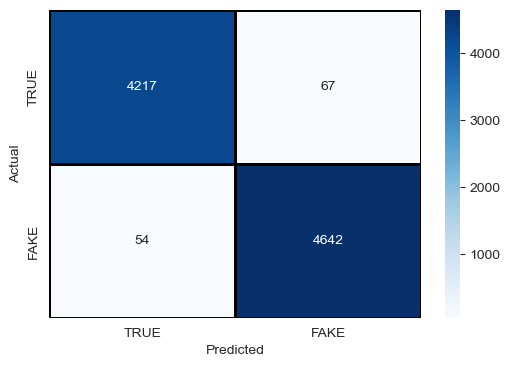

In [169]:
cm = confusion_matrix(y_test,pred.round())
cm = pd.DataFrame(cm , index = ['TRUE','FAKE'] , columns = ['TRUE','FAKE'])
plt.figure(figsize = (6,4))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['TRUE','FAKE'] , yticklabels = ['TRUE','FAKE'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [170]:
print(classification_report(y_test,pred.round()))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4284
           1       0.99      0.99      0.99      4696

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [171]:
y_pred = model.predict(X_test).ravel()

281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


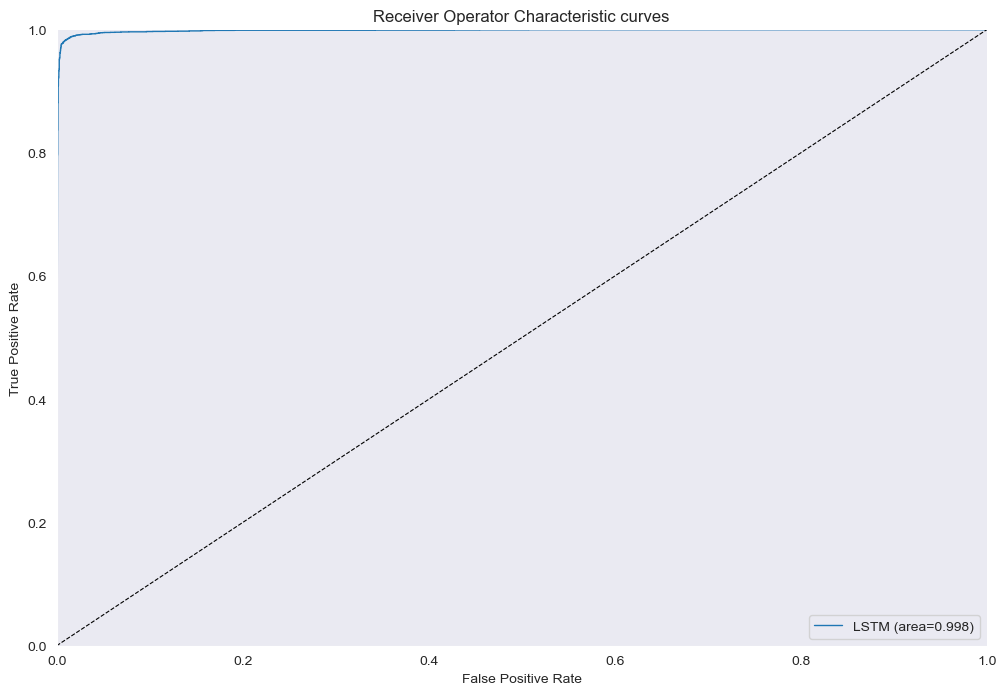

In [172]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba)))

f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test,y_pred,label='LSTM', l='-')



ax.plot([0,1], [0,1], color='k', linewidth=0.8, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()

In [173]:
testSent =["Trey Gowdy destroys this clueless DHS employee when asking about the due process of getting on the terror watch list. Her response is priceless:  I m sorry, um, there s not a process afforded the citizen prior to getting on the list.  ",
       "Poland s new prime minister faces a difficult balancing act trying to repair bruised relations with the European Union without alienating the eurosceptic government s core voters. A Western-educated former banker who is fluent in German and English and was sworn in on Monday, Mateusz Morawiecki boasts the credentials needed to negotiate with Brussels. But any compromises to improve relations with Brussels, which sees the ruling Law and Justice (PiS) party as a threat to democracy, would risk upsetting the traditional, Catholic supporters who propelled it into power two years ago. It is a gamble that could backfire, and it is not yet clear how far Morawiecki, 49, and his party, dominated by former Prime Minister Jaroslaw Kaczynski, are ready to go to please Brussels.   The idea to build up international credibility seems rational,  said Jaroslaw Flis, a sociologist at the Jagiellonian University.  But such actions would have to be in complete contrast with what Mateusz Morawiecki would have to do domestically to prevent the PiS from falling apart.  The PiS government has alienated many people at home and abroad with its nationalist rhetoric and changes to state institutions which the EU says subvert the bloc s laws. The European Commission, the EU executive, opened an inquiry into the rule of law in Poland in January 2016 and the European Parliament has started a process that could deprive Poland of its voting rights in the 28-nation bloc. Any hope in Brussels that Morawiecki s appointment signals a change of course by PiS will have been tempered by Polish parliament approving legal changes to the judiciary in defiance of the EU on Friday - the day after his nomination. The changes give parliament, where PiS has a majority, de facto control over the selection of judges. EU leaders looking for clues about Morawiecki s plans will also have taken little comfort from comments he has made since being nominated, making clear he backs a tough line on the EU and believes in PiS s traditional vision of the Polish state.   We want to transform Europe, this is my dream, to re-christianise it,  Morawiecki told the Catholic Radio Maryja broadcaster.  We want Poland to be strong, but also to contain ... Christian values. We will defend them against the background of laicisation and a deepening consumerism.  Asked by the radio interviewer about demands by French President Emmanuel Macron for Poland to face sanctions over a subversion of democratic rules, Morawiecki said he would not  bow down to blackmail.  In comments to parliament on Tuesday, Morawiecki suggested Poland might relent in a conflict with Brussels over logging in an ancient forest, which an EU court has said contravenes EU laws. But he said Poland s national interests came first in any debate over the future of the EU and that he  wholeheartedly  supported PiS s overhaul of the judiciary. Like Beata Szydlo, whom he replaced as prime minister, Morawiecki is likely to have to defer to PiS leader and co-founder Jaroslaw Kaczynski. Prime minister from July 2006 to November 2007, Kaczynski is widely seen as the power behind the party and Poland s main decision-maker. How much scope that will leave Morawiecki to carve out his own path remains to be seen. Former Polish President Lech Walesa, a PiS critic, has suggested that nothing of substance will change.  The circus has stayed the same, only the clowns have changed their roles,  Walesa, who led the Solidarity trade union movement that ended communist rule, said on Twitter.  The appointment of Morawiecki, whose father founded and led a radical offshoot of Solidarity in the 1980s, appears designed in part to present a new face of Poland to the EU. Szydlo, 54, at times responded angrily to EU criticism and relations with the bloc soured under her government. Underlining PiS opposition to Muslim immigration, she said last month Poland wanted to be sure Christian traditions were not subject to  ideological censorship  in the EU. Along with Hungary, Poland has refused to take in any of its quota of the wave of refugees from Syria and elsewhere who have come to Europe since 2015, on the grounds that Muslim immigrants are a threat to national security and stability.         Such comments appeal to core PiS voters, and Szydlo s government, which promised generous welfare payouts and a dedication to traditional Catholic values, was one of Poland s most popular since communist rule ended in 1989. A relative newcomer to politics, Morawiecki lacks Szydlo s broad appeal. But he has overseen significant economic achievements since becoming finance minister in 2016, a position he has retained in the new government. Tusk has welcomed what he sees as signs that Morawiecki is a liberal economist who wants better ties with the EU.  There is no doubt that (Morawiecki s) liberal bias and some pro-western gestures could be a sign that there is a lurking desire to improve relations,  Tusk said last week. But an economic stimulus plan Morawiecki unveiled in 2016 has been criticized by economists who say it depends heavily on private investment, which is low in Poland despite fast economic growth.  What Morawiecki sees as a solution, meaning more political influence in the economy, is actually dangerous,  said Leszek Balcerowicz, a former finance minister who coordinated the transition to a market economy after decades of communist rule. Any hint of protectionism is also likely to worry EU leaders, who seek to break down trade barriers.  Morawiecki has called the privatization of state-owned companies a tragedy and said he will give more power to domestic capital at the expense of foreign investors. In his comments to parliament on Tuesday, he said economic policy should not change.  ",
      ]

In [174]:
def cleanText(txt):
    txt = txt.lower()
    txt = ' '.join([word for word in txt.split() if word not in (stop)])
    txt = re.sub('[^a-z]',' ',txt)
    return txt  


In [175]:
def predict_text(lst_text):
    test = tokenizer.texts_to_sequences(lst_text)
    testX = pad_sequences(test, maxlen=MAX_SEQUENCE_LENGTH)
    df_test = pd.DataFrame(lst_text, columns = ['test_sent'])

    prediction = model.predict(testX)
    df_test['prediction']=prediction
    df_test["test_sent"] = df_test["test_sent"].apply(cleanText)
    df_test['prediction']=df_test['prediction'].apply(lambda x: "Fake" if x>=0.5 else "Real")
    return df_test

In [176]:
df_testsent = predict_text(testSent)
df_testsent

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


,test_sent,prediction
0,trey gowdy destroys clueless dhs employee aski...,Fake
1,poland new prime minister faces difficult bala...,Real
